In [1]:
# Gerando Modelo de Machine Learning (Classificação)
# Preparação dos Dados e Treinamento do Modelo de Machine Learning - Parte 1.
#Halline Araújo

In [3]:
#Conjunto de importacoes
import numpy as np #biblioteca de manipulação de valores vetor, matriz multidimensionais; biblioteca de machine learning que manipula dados, objetos grandes
import pandas as pd #é uma biblioteca de manipulação de dados equivalente ao excel
import matplotlib.pyplot as plt #biblioteca de visualização de dados 2d e 3d, serve para manipular e visualizar informações em vários tipos de gráfico
from sklearn.naive_bayes import MultinomialNB #é a principal biblioteca de Machine Learning para python, onde estão os 80 algoritmos de ML(supervisionados, não-supervisionados, reforço) para desenvolver com python
from sklearn.naive_bayes import GaussianNB #é a principal biblioteca de Machine Learning para python, onde estão os 80 algoritmos de ML(supervisionados, não-supervisionados, reforço) para desenvolver com python
from sklearn.metrics import accuracy_score #mostra a acurácia e precisão
from sklearn.model_selection import train_test_split #pega a base toda e separa as partes de teste e treinamento

In [4]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_mamiferos_treino = pd.read_csv("dados_mamiferos_treino.csv", encoding="utf-8")

In [5]:
#visualizando os dados mostrando as 5 primeiras linhas do dataframe; para visualizar as 5 ultimas linhas usa o comando
#nomeDoDataframe.tail().Se quiser ver as 15 ultimas linhas coloca o parametro dentro dos parenteses
dados_mamiferos_treino.head()

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
0,1,humano,1,2,2,2,1
1,2,cobra,2,1,2,2,0
2,3,baleia,1,2,2,1,1
3,4,sapo,1,1,2,3,0
4,5,morcego,1,2,1,2,1


In [7]:
dados_mamiferos_treino.tail()

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
11,12,salamandra,2,1,2,3,0
12,13,coruja,1,1,1,2,0
13,14,golfinho,1,2,2,1,1
14,15,águia,1,1,1,2,0
15,16,ornitorrinco,1,1,2,2,1


In [9]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_mamiferos_treino[['sangue', 'bota_ovo', 'voa', 'mora_agua']])
#Definição do atributo de classificacao
data_classif = np.array(dados_mamiferos_treino['classificacao'])

In [12]:
#mostra quantas linhas e colunas existe no dataframe
dados_mamiferos_treino.shape

(16, 7)

In [13]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
#metodo ranger filtra as colunas
def plot_corr(dados_mamiferos_treino, size=10):
    corr = dados_mamiferos_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

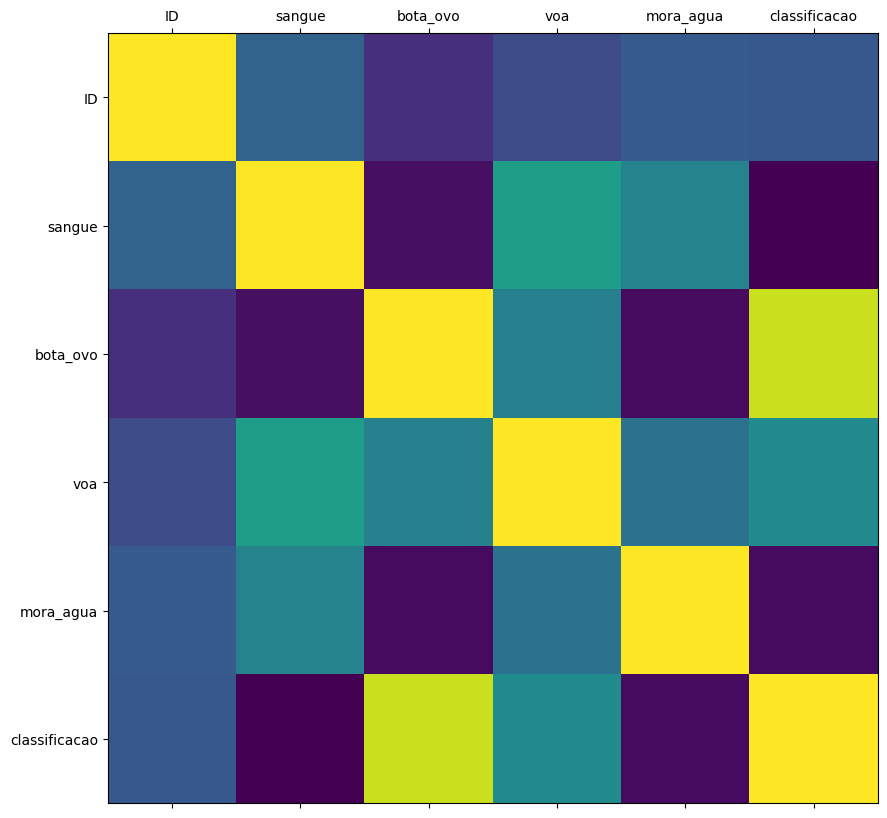

In [14]:
# Criando o gráfico: representa uma matriz de correlação com as featurings que fazem parte do dataframe; oq esta na diagonal tem
#100% de correlação. Featurings essenciais ou fundamentais tem maior correlação (cores claras) quanto mais escuro pior
#a correlação
plot_corr(dados_mamiferos_treino)

In [18]:
# Spliting = 70% para dados de treino e 30% para dados de teste(separando as bases de treinamento e teste)
#Definição dos conjuntos de treinamento e validação de forma randômica: x_treino dados de treinamento e y_treino
#dados de validação; x_val e y_val(classificação)
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [19]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[1 2 2 1]
 [2 1 2 2]
 [2 1 2 3]
 [1 2 1 2]
 [2 1 2 1]
 [1 1 2 2]
 [1 1 1 2]
 [1 2 2 1]
 [1 2 2 2]
 [2 1 2 3]
 [1 1 2 3]]
Conjunto de Validacao
[[1 2 2 2]
 [1 1 1 2]
 [1 1 2 3]
 [1 1 1 2]
 [1 2 2 2]]
-----------------------


In [20]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_mamiferos_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_mamiferos_treino.index)) * 100))

68.75% nos dados de treino
31.25% nos dados de teste


In [21]:
#selecionando o modelo ML - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [22]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento.GaussianNB()é o método construtor
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [23]:
#Predição e acurácia para o conjunto de treinamento
#metodo feat(): treina o modelo; método predict(): testa o modelo
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.9090909090909091
Na Base de Treinamento


In [24]:
#Predição e acurácia para o conjunto de validação
#o professor mudou a acuracia(leva em consideração o todo) de teste anteriormente (35%) e a validação dele deu menor
#eu não mudei por isso ficou 100%
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
1.0
na Base de Teste e ou Validação


In [25]:
from sklearn import metrics

In [26]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[2 0]
 [0 3]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           0       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

